<a href="https://colab.research.google.com/github/JulianSantos-LATAMAI/ECON-5200/blob/main/1/Econ_5200_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

In [23]:
# Manual DGP Simulation
import numpy as np
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [24]:
print(latency_logs)

[  49   27   31   33   25   21   45   26   26   34   38   41   45   31
   27   49   39   31   25   24   48   23   28   29   28   28   47   25
   33   34   22   39   46   45   23   39   33   29   48   33   33   44
   37   21   33   22   39   28   44   30   28   45   46   20   22   21
   20   38   46   22   46   31   45   41   44   44   25   26   41   48
   31   27   42   23   25   43   28   36   20   39   26   25   42   24
   44   24   48   38   44   45   24   38   39   31   30   30   45   20
   21   32   35   21   37   28   46   47   42   30   21   36   40   21
   25   43   25   32   38   39   28   27   46   47   27   42   22   22
   49   37   37   22   46   39   29   34   34   31   20   34   44   37
   37   33   21   21   40   31   31   20   44   46   41   20   47   23
   38   39   31   20   47   44   40   43   25   32   46   40   41   41
   32   38   41   40   27   45   29   31   30   34   48   44   40   34
   38   41   48   27   49   45   31   37   46   28   21   40   31   36
   40 

In [25]:
def calculate_mad(data):
    # 1. Calculate the Median of the data
    median_data = np.median(data)
    # 2. Calculate Absolute Deviations (|x - median|)
    abs_deviations = np.abs(data - median_data)
   # 3. Calculate Mad
    mad = np.median(abs_deviations)
    return mad

In [26]:
import numpy as np
# 4. ANALYSIS: Calculate and Print Standard Deviation and MAD

std_dev = np.std(latency_logs)
mad_value = calculate_mad(latency_logs)

print(f"Standard Deviation: {std_dev:.2f}")
print(f"Median Absolute Deviation (MAD): {mad_value:.2f}")

Standard Deviation: 427.36
Median Absolute Deviation (MAD): 8.00


In [ ]:
# The standad deviation is squared deviations from the mean which means that outliers contribute heavily to its value.
# On the other hand, the MAD doesnt get affected by outliers as heavily meaning it will be a more stable number.

In [28]:
def bayesian_audit(prior, sensitivity, specificity):

    # P(Flagged | Cheater)
    true_positive = sensitivity * prior

    # P(Flagged | Not Cheater)
    false_positive = (1 - specificity) * (1 - prior)

    # P(Cheater | Flagged)
    posterior = true_positive / (true_positive + false_positive)

    return posterior


# Test the scenarios
print("IntegrityAI Claims: 98% Sensitivity, 98% Specificity\n")

scenarios = [
    ("Scenario A (Bootcamp)", 0.50),
    ("Scenario B (Econ Class)", 0.05),
    ("Scenario C (Honors Seminar)", 0.001)
]

for name, base_rate in scenarios:
    result = bayesian_audit(base_rate, 0.98, 0.98)
    print(f"{name}: Base Rate = {base_rate*100}%")
    print(f"  → P(Cheater | Flagged) = {result:.1%}")
    print()

IntegrityAI Claims: 98% Sensitivity, 98% Specificity

Scenario A (Bootcamp): Base Rate = 50.0%
  → P(Cheater | Flagged) = 98.0%

Scenario B (Econ Class): Base Rate = 5.0%
  → P(Cheater | Flagged) = 72.1%

Scenario C (Honors Seminar): Base Rate = 0.1%
  → P(Cheater | Flagged) = 4.7%



In [32]:
# Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
#observed values
observed = np.array([50250,49750])
#expected values (even split)
expected = np.array([50000,50000])
# Write the calculation loop...
chi_square = np.sum((observed - expected)**2 / expected)
print(chi_square)


2.5


In [ ]:
#Chi Square is2.5 which is less than 3.84, making this A/B test completley and inarguabley VALID.
#However, FinFlash's claim of the 50/50 split is not accurate but since the statistic is under 3.84, the results are valid


SURVIVORSHIP BIAS ANALYSIS - CRYPTO MARKETS

Total Tokens Launched: 10,000
Survivors (Top 1%): 100
Failed/Obscure (Bottom 99%): 9,900

Mean Market Cap (ALL tokens): $47,650.34M
Mean Market Cap (SURVIVORS only): $1,490,810.57M

BIAS MULTIPLIER: 31.29x

⚠️  If you only study survivors, you overestimate
    the average token success by 31.3x!


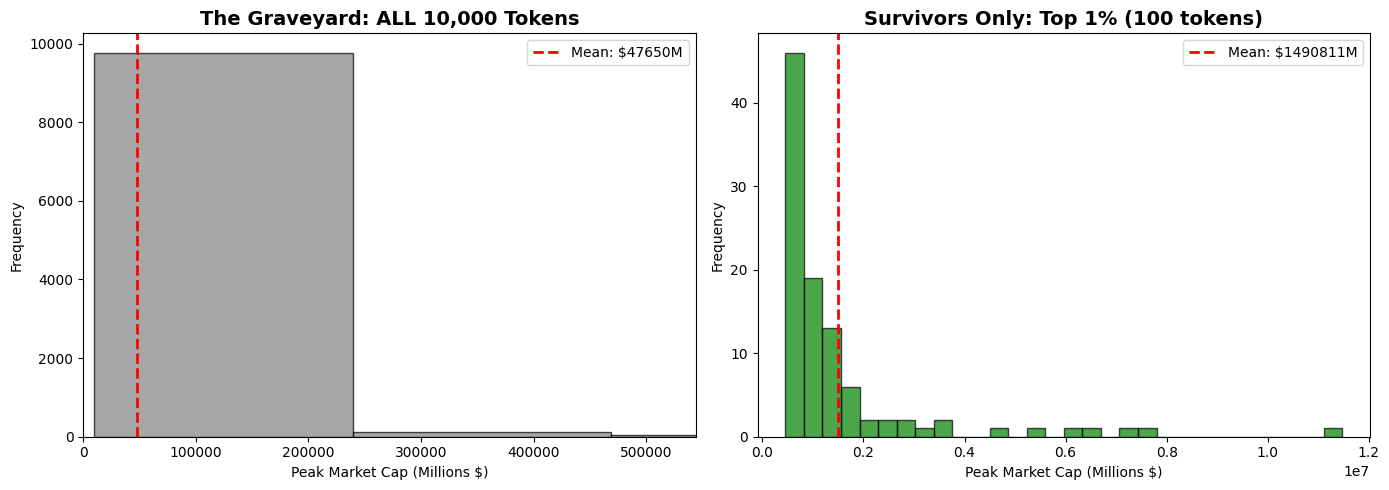


📊 Visualization saved as 'survivorship_bias_crypto.png'


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Simulate 10,000 token launches with Pareto distribution (Power Law)
n_tokens = 10000
shape = 1.16  # Shape parameter for heavy tail (99% near zero)

# Generate peak market caps using Pareto distribution
# Scale to realistic crypto market cap range (millions)
market_caps = (np.random.pareto(shape, n_tokens) + 1) * 10000

# Create DataFrame for ALL tokens (The Graveyard)
df_all = pd.DataFrame({
    'token_id': range(1, n_tokens + 1),
    'peak_market_cap': market_caps
})

# Create DataFrame for SURVIVORS only (Top 1%)
threshold = np.percentile(market_caps, 99)
df_survivors = df_all[df_all['peak_market_cap'] >= threshold].copy()

# Calculate mean market caps
mean_all = df_all['peak_market_cap'].mean()
mean_survivors = df_survivors['peak_market_cap'].mean()

# Print statistics
print("="*60)
print("SURVIVORSHIP BIAS ANALYSIS - CRYPTO MARKETS")
print("="*60)
print(f"\nTotal Tokens Launched: {len(df_all):,}")
print(f"Survivors (Top 1%): {len(df_survivors):,}")
print(f"Failed/Obscure (Bottom 99%): {len(df_all) - len(df_survivors):,}")
print(f"\n{'='*60}")
print(f"Mean Market Cap (ALL tokens): ${mean_all:,.2f}M")
print(f"Mean Market Cap (SURVIVORS only): ${mean_survivors:,.2f}M")
print(f"\nBIAS MULTIPLIER: {mean_survivors/mean_all:.2f}x")
print(f"{'='*60}")
print(f"\n⚠️  If you only study survivors, you overestimate")
print(f"    the average token success by {mean_survivors/mean_all:.1f}x!")

# Create dual histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram 1: The Graveyard (ALL tokens)
axes[0].hist(df_all['peak_market_cap'], bins=50, color='gray', alpha=0.7, edgecolor='black')
axes[0].axvline(mean_all, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_all:.0f}M')
axes[0].set_xlabel('Peak Market Cap (Millions $)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('The Graveyard: ALL 10,000 Tokens', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].set_xlim(0, threshold * 1.2)

# Histogram 2: The Survivors (Top 1%)
axes[1].hist(df_survivors['peak_market_cap'], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1].axvline(mean_survivors, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_survivors:.0f}M')
axes[1].set_xlabel('Peak Market Cap (Millions $)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Survivors Only: Top 1% (100 tokens)', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('survivorship_bias_crypto.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Visualization saved as 'survivorship_bias_crypto.png'")